In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

<h1>1. Setting Feature</h1>

In [35]:
try:
    df = pd.read_csv(r'..\Project\books.csv')
except pd.errors.ParserError as e:
    print(f"Error: {e}")

df_author = pd.read_csv(r'..\additionnal_data\author_info.csv')
df_genre = pd.read_csv(r'..\additionnal_data\books_genre.csv')
df_info = pd.read_csv(r'..\additionnal_data\books_info.csv')
# Error on the data so we went to correct the data in the csv file


Error: Error tokenizing data. C error: Expected 12 fields in line 3350, saw 13



- Error: Error tokenizing data. C error: Expected 12 fields in line 3350, saw 13
- Error: Error tokenizing data. C error: Expected 12 fields in line 4704, saw 13
- Error: Error tokenizing data. C error: Expected 12 fields in line 5879, saw 13
- Error: Error tokenizing data. C error: Expected 12 fields in line 8981, saw 13

Those error are all because some author fields contains ",", so it kill the shape of the csv file.
the new corrected file is located in "..\DataBase\books.csv"


In [36]:
df = pd.read_csv(r'..\DataBase\books.csv')
df_author = pd.read_csv(r'..\additionnal_data\author_info.csv')
df_genre = pd.read_csv(r'..\additionnal_data\books_genre.csv')
df_info = pd.read_csv(r'..\additionnal_data\books_info.csv')

df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [37]:

df_author.head()

,average_rating,author_id,text_reviews_count,name,ratings_count
0,3.98,604031,7,Ronald J. Fields,49
1,4.08,626222,28716,Anita Diamant,546796
2,3.92,10333,5075,Barbara Hambly,122118
3,3.68,9212,36262,Jennifer Weiner,888522
4,3.82,149918,96,Nigel Pennick,1740


In [38]:

df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [39]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,32104.500000,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


it would be logical that books with low amount of rating, would be less reliable, so we need to choose at what amount of rating we choose to drop a line because of non-reliability. We can already imagine that books with amount of rating equal to 0 will not be kept. (this will be find in recap_db_feature.py)

In [40]:
df_author = df_author.dropna()
df_author.head()

,average_rating,author_id,text_reviews_count,name,ratings_count
0,3.98,604031,7,Ronald J. Fields,49
1,4.08,626222,28716,Anita Diamant,546796
2,3.92,10333,5075,Barbara Hambly,122118
3,3.68,9212,36262,Jennifer Weiner,888522
4,3.82,149918,96,Nigel Pennick,1740


In [41]:
df_info = df_info.dropna()

values_to_keep = df['isbn13'].unique()

# Filter df_info to keep only rows where column1 values are in values_to_keep
df_info = df_info[df_info['isbn13'].isin(values_to_keep)]

df_info.to_csv(r"..\..\Nate Solution\additionnal_data\books_info.csv")
df_info.head()

,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,book_id,country_code,authors,isbn13
0,0,0,0,0,0,0,807,38568,US,"[{'author_id': '17059', 'role': ''}]",9780060773755
1,1,1,1,1,1,1,816,38562,US,"[{'author_id': '17059', 'role': ''}]",9780060774073
2,2,2,2,2,2,2,818,38564,US,"[{'author_id': '21701', 'role': ''}]",9780425209424
3,3,3,3,3,3,3,1138,39307,US,"[{'author_id': '1356336', 'role': ''}]",9780312940027
4,4,4,4,4,4,4,1341,23717,US,"[{'author_id': '12948', 'role': ''}]",9781569312063


In [42]:
df_genre = df_genre.dropna()

values_to_keep = df_info['book_id'].unique()

# Filter df_info to keep only rows where column1 values are in values_to_keep
df_genre = df_genre[df_genre['book_id'].isin(values_to_keep)]

df_genre.to_csv(r"..\..\Nate Solution\additionnal_data\books_genre.csv")

df_genre.head()

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,book_id,genres
0,0,0,0,0,807,38568,"{'fantasy, paranormal': 1907, 'romance': 1598,..."
1,1,1,1,1,816,38562,"{'fantasy, paranormal': 1002, 'romance': 896, ..."
2,2,2,2,2,818,38564,"{'young-adult': 315, 'fantasy, paranormal': 27..."
3,3,3,3,3,1138,39307,"{'fantasy, paranormal': 128, 'romance': 40, 'f..."
4,4,4,4,4,1341,23717,"{'fantasy, paranormal': 3, 'fiction': 2, 'comi..."


<H1>Join the datasets</h1>

In [43]:
#join df and df_info
df['isbn13'] = df['isbn13'].astype(str)
df_info['isbn13'] = df_info['isbn13'].astype(str)

final_df = pd.merge(df, df_info, on = 'isbn13', how = 'inner')
final_df.head()

,bookID,title,authors_x,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,...,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,book_id,country_code,authors_y
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,...,3424,3424,3424,3424,3424,3424,861044,1,US,"[{'author_id': '1077326', 'role': ''}, {'autho..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,...,8247,8247,8247,8247,8247,8247,2083381,2,US,"[{'author_id': '1077326', 'role': ''}, {'autho..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,...,4767,4767,4767,4767,4767,4767,1211232,4,US,"[{'author_id': '1077326', 'role': ''}]"
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,...,4029,4029,4029,4029,4029,4029,1028676,5,US,"[{'author_id': '1077326', 'role': ''}, {'autho..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,...,9221,9221,9221,9221,9221,9221,2335569,8,US,"[{'author_id': '1077326', 'role': ''}, {'autho..."


In [44]:
import ast
def extract_author_id(cell):
    try:
        # Convert the string representation of a list of dictionaries to a list object
        dictionary_list = ast.literal_eval(cell)
        # Extract the "author_id" value from each dictionary
        author_ids = [d["author_id"] for d in dictionary_list]
        return author_ids
    except (ValueError, SyntaxError):
        # Return an empty list if the input is not a valid list of dictionaries
        return []

# Apply the function to each cell of the DataFrame
final_df['authors_y'] = final_df['authors_y'].apply(extract_author_id)

final_df.head()
final_df.to_csv(r"test.csv", index=False)
final_df.head()

,bookID,title,authors_x,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,...,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,book_id,country_code,authors_y
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,...,3424,3424,3424,3424,3424,3424,861044,1,US,"[1077326, 2927]"
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,...,8247,8247,8247,8247,8247,8247,2083381,2,US,"[1077326, 2927]"
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,...,4767,4767,4767,4767,4767,4767,1211232,4,US,[1077326]
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,...,4029,4029,4029,4029,4029,4029,1028676,5,US,"[1077326, 2927]"
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,...,9221,9221,9221,9221,9221,9221,2335569,8,US,"[1077326, 2927]"


In [45]:
#join final_df with df_genre
final_df = pd.merge(final_df, df_genre, on = 'book_id', how = 'inner')
def extract_keys(cell):
    try:
        # Convert the string representation of a dictionary to a dictionary object
        dictionary = ast.literal_eval(cell)
        # Return the keys if the input is a dictionary
        return list(dictionary.keys())
    except (ValueError, SyntaxError):
        # Return an empty list if the input is not a valid dictionary
        return []

# Apply the function to each cell of the DataFrame
final_df['genres'] = final_df['genres'].apply(extract_keys)
final_df.head()

,bookID,title,authors_x,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,...,Unnamed: 0_x,book_id,country_code,authors_y,Unnamed: 0.4_y,Unnamed: 0.3_y,Unnamed: 0.2_y,Unnamed: 0.1_y,Unnamed: 0_y,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,...,861044,1,US,"[1077326, 2927]",3424,3424,3424,3424,861044,"[fantasy, paranormal, young-adult, fiction, ch..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,...,2083381,2,US,"[1077326, 2927]",8247,8247,8247,8247,2083381,"[fantasy, paranormal, children, fiction, young..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,...,1211232,4,US,[1077326],4767,4767,4767,4767,1211232,"[fantasy, paranormal, young-adult, fiction, ch..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,...,1028676,5,US,"[1077326, 2927]",4029,4029,4029,4029,1028676,"[fiction, children, fantasy, paranormal, young..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,...,2335569,8,US,"[1077326, 2927]",9221,9221,9221,9221,2335569,"[fantasy, paranormal, young-adult, fiction, ch..."


In [46]:
final_df.to_csv(r"..\..\Nate Solution\additionnal_data\improved_dataset.csv", index=False)

now launch Nate Solution\additionnal_data\weighted_mean_for_author_rates.py for having the final improved dataset

In [47]:
improved_dataset = pd.read_csv(r"..\..\Nate Solution\additionnal_data\improved_dataset.csv")

improved_dataset.head()

,bookID,title,authors_x,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,...,Unnamed: 0_x,book_id,country_code,authors_y,Unnamed: 0.4_y,Unnamed: 0.3_y,Unnamed: 0.2_y,Unnamed: 0.1_y,Unnamed: 0_y,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,...,861044,1,US,"['1077326', '2927']",3424,3424,3424,3424,861044,"['fantasy, paranormal', 'young-adult', 'fictio..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,...,2083381,2,US,"['1077326', '2927']",8247,8247,8247,8247,2083381,"['fantasy, paranormal', 'children', 'fiction',..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,...,1211232,4,US,['1077326'],4767,4767,4767,4767,1211232,"['fantasy, paranormal', 'young-adult', 'fictio..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,...,1028676,5,US,"['1077326', '2927']",4029,4029,4029,4029,1028676,"['fiction', 'children', 'fantasy, paranormal',..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,...,2335569,8,US,"['1077326', '2927']",9221,9221,9221,9221,2335569,"['fantasy, paranormal', 'young-adult', 'fictio..."


In [48]:
improved_dataset.count()

bookID                9289
title                 9289
authors_x             9289
average_rating        9289
isbn                  9289
isbn13                9289
language_code         9289
  num_pages           9289
ratings_count         9289
text_reviews_count    9289
publication_date      9289
publisher             9289
Unnamed: 0.6          9289
Unnamed: 0.5          9289
Unnamed: 0.4_x        9289
Unnamed: 0.3_x        9289
Unnamed: 0.2_x        9289
Unnamed: 0.1_x        9289
Unnamed: 0_x          9289
book_id               9289
country_code          9289
authors_y             9289
Unnamed: 0.4_y        9289
Unnamed: 0.3_y        9289
Unnamed: 0.2_y        9289
Unnamed: 0.1_y        9289
Unnamed: 0_y          9289
genres                9289
dtype: int64

In [49]:
improved_dataset.isna().sum()

bookID                0
title                 0
authors_x             0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
Unnamed: 0.6          0
Unnamed: 0.5          0
Unnamed: 0.4_x        0
Unnamed: 0.3_x        0
Unnamed: 0.2_x        0
Unnamed: 0.1_x        0
Unnamed: 0_x          0
book_id               0
country_code          0
authors_y             0
Unnamed: 0.4_y        0
Unnamed: 0.3_y        0
Unnamed: 0.2_y        0
Unnamed: 0.1_y        0
Unnamed: 0_y          0
genres                0
dtype: int64

ZERO NULL VALUE

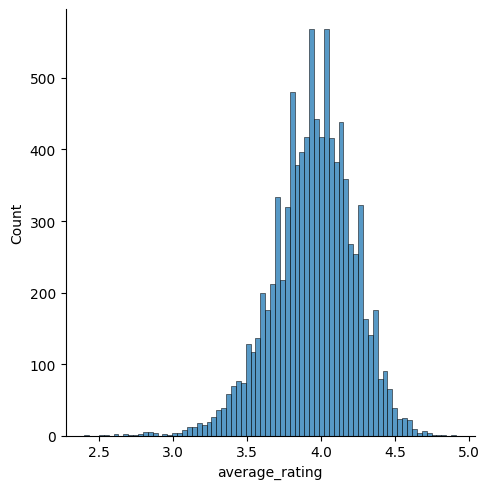

In [17]:
sns.displot(improved_dataset.average_rating)

In [50]:
improved_dataset.head()

,bookID,title,authors_x,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,...,Unnamed: 0_x,book_id,country_code,authors_y,Unnamed: 0.4_y,Unnamed: 0.3_y,Unnamed: 0.2_y,Unnamed: 0.1_y,Unnamed: 0_y,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,...,861044,1,US,"['1077326', '2927']",3424,3424,3424,3424,861044,"['fantasy, paranormal', 'young-adult', 'fictio..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,...,2083381,2,US,"['1077326', '2927']",8247,8247,8247,8247,2083381,"['fantasy, paranormal', 'children', 'fiction',..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,...,1211232,4,US,['1077326'],4767,4767,4767,4767,1211232,"['fantasy, paranormal', 'young-adult', 'fictio..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,...,1028676,5,US,"['1077326', '2927']",4029,4029,4029,4029,1028676,"['fiction', 'children', 'fantasy, paranormal',..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,...,2335569,8,US,"['1077326', '2927']",9221,9221,9221,9221,2335569,"['fantasy, paranormal', 'young-adult', 'fictio..."


In [106]:
improved_dataset = pd.read_csv(r"..\DataBase\improved_dataset.csv")

In [88]:
import re
genre = improved_dataset["genres"].unique()
l = []
for each in genre:
    contenu_entre_tirets = re.findall(r"'(.*?)'", each)
    for item in contenu_entre_tirets:
        l.append(item)

print(len(set(l)))

10


In [107]:

improved_dataset['genres'] = improved_dataset['genres'].apply(ast.literal_eval)
vectorise_genre=pd.get_dummies(improved_dataset['genres'].apply(pd.Series).stack()).groupby(level=0).sum()
improved_dataset = pd.concat([improved_dataset.drop('genres', axis=1), vectorise_genre], axis=1)

improved_dataset=improved_dataset.drop(columns=["bookID","title","authors","isbn","isbn13","book_id","publisher"], axis=1)
improved_dataset.head()


,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,country_code,author_mean_rates,children,"comics, graphic","fantasy, paranormal",fiction,"history, historical fiction, biography","mystery, thriller, crime",non-fiction,poetry,romance,young-adult
0,4.57,eng,652,2095690,27591,9/16/2006,US,4.463,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,4.49,eng,870,2153167,29221,9/1/2004,US,4.463,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,4.42,eng,352,6333,244,11/1/2003,US,4.440,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4.56,eng,435,2339585,36325,5/1/2004,US,4.463,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4.78,eng,2690,41428,164,9/13/2004,US,4.463,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


<h2>1.1 BookID</h2> 

there is no interest to keep bookID, being a fictif number

<h2>1.2 Title</h2>

- we can try to look if the number of word and the lenght of the title have an impact
- or drop

<h2>1.3 Authors</h2>

- We will drop this columns, there is too many different author for having the possibility to Vectorize

<h2>1.4 Average_rating</h2>

- will be the target feature to evaluate, stay in this shape

<h2>1.5 Isbn</h2>

- this is only an identifier so no value as raw data, but can possibly help us to improve database

<h2>1.6 Isbn13</h2>

- this is only an identifier so no value as raw data, but can possibly help us to improve database and contain language key that can maybe be used

<h2>1.7 Language_code</h2>

- Can try the simple vectorization, vectorization with generalisation of language_code, or drop

<h2>1.8 Num_pages</h2>

- we can keep it and drop it, and see which result is the best

<h2>1.9 Ratings_count</h2> 

In [38]:
round(df['average_rating']).value_counts()

average_rating
4.0    10204
3.0      696
5.0      189
0.0       26
2.0       10
1.0        2
Name: count, dtype: int64

Let's drop all books with rating count equal to 0:

In [24]:
new_df = df[df["ratings_count"] > 0]
round(new_df['average_rating']).value_counts()

average_rating
4.0    10161
3.0      689
5.0      185
2.0        9
1.0        2
Name: count, dtype: int64

In [42]:
new_df = df[df["ratings_count"] > 50]
round(new_df['average_rating']).value_counts()

average_rating
4.0    8630
3.0     476
5.0     106
2.0       1
Name: count, dtype: int64

We can see that the grades close to 0 don't have a lot of rating in general and desapear when we filter by ratings_count > 50, with could go futher but we can see that when we filter by ratings_count > 100, there is still the same proportion of rating for each grade, so we could try to filter ratings_count > 0 and ratings_count > 50

In [43]:
new_df = df[df["ratings_count"] > 100]
round(new_df['average_rating']).value_counts()

average_rating
4.0    7878
3.0     420
5.0      94
2.0       1
Name: count, dtype: int64

<h2>1.10 text_reviews_count</h2>

- Let's keep it

<h2>1.11 publication_date</h2>

- we can try multiple shape of date:
    - keeping only the day
    - keeping only the month
    - keeping only the year
    - keeping the all date
    - keeping the age of the book
    - or finally if there is no influence: drop this column

<h2>1.12 publisher</h2>

- there is too many different publisher for trying to vectorize or keeping it, so drop